In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
raw_df= pd.read_csv('../input/top-play-store-games/android-games.csv')
raw_df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False
2,3,Mobile Legends: Bang Bang,25836869,100.0 M,4.08,1.6,3.3,0.0,GAME ACTION,17850942,1796761,1066095,725429,4397640,False
3,4,Brawl Stars,17181659,100.0 M,4.27,4.1,6.6,0.0,GAME ACTION,12493668,1474319,741410,383478,2088781,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14237554,100.0 M,4.33,0.8,1.8,0.0,GAME ACTION,9657878,2124544,1034025,375159,1045945,False


In [3]:
raw_df.shape

(1730, 15)

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [5]:
raw_df.describe().round(2)

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00,1730.00
mean,50.48,1101181.54,4.31,193.17,3.97,0.01,788383.68,121646.65,59549.86,27962.47,103636.36
std,28.94,3311738.49,0.25,4775.62,18.91,0.24,2483061.11,295570.10,144740.04,76766.25,358986.88
min,1.00,38238.00,3.09,0.00,0.00,0.00,21898.00,2441.00,707.00,288.00,527.00
25%,25.00,187998.75,4.18,0.10,0.30,0.00,135829.00,21802.00,10277.75,4529.50,13560.75
50%,51.00,457675.00,4.33,0.50,1.00,0.00,310943.50,54643.50,26658.50,11330.50,35694.00
75%,75.75,944334.25,4.49,1.60,3.30,0.00,651131.00,109564.75,55817.50,25266.50,86326.25
max,100.00,80678661.00,4.91,140394.40,605.10,7.49,61935712.00,5397273.00,2795172.00,1814999.00,9654037.00


In [6]:
raw_df.isna().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [7]:
for i in raw_df.columns:
    print(i)
    print(raw_df[i].dtype)
    print('Unique values are: ', raw_df[i].unique())
    print('-' * 100)

rank
int64
Unique values are:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
----------------------------------------------------------------------------------------------------
title
object
Unique values are:  ['Garena Free Fire - The Cobra' 'PUBG MOBILE: Graffiti Prank'
 'Mobile Legends: Bang Bang' ... '4 Fotos 1 Palavra'
 'زوايا - لعبة ستحرك زوايا عقلك' 'Word Life - Connect crosswords puzzle']
----------------------------------------------------------------------------------------------------
total ratings
int64
Unique values are:  [80678661 35971961 25836869 ...   114852   110293   109809]
--------------------------------------

In [8]:
df= raw_df.copy()

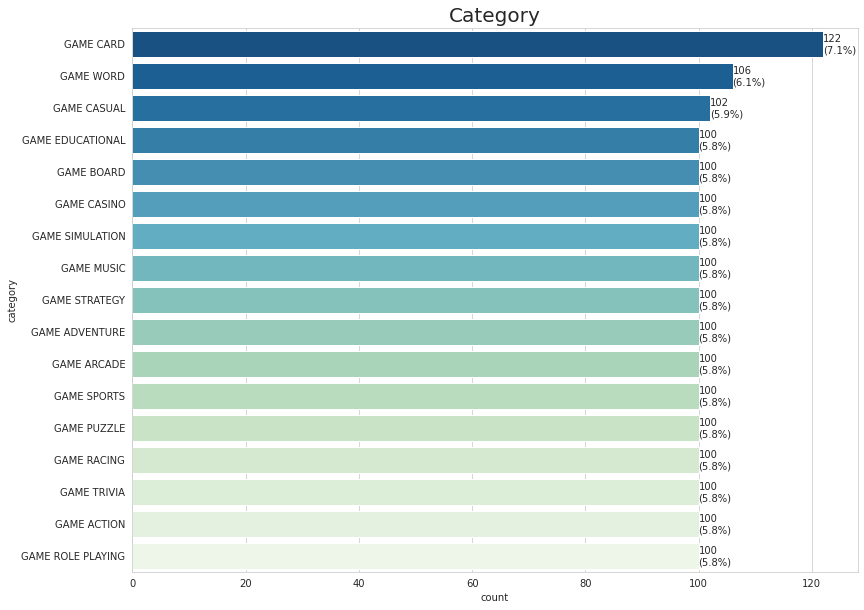

In [9]:
sns.set_style('whitegrid')

plt.figure(figsize= (13, 10))

ax= sns.countplot(y= 'category', data= df, order= df['category'].value_counts().index, palette= 'GnBu_r')
plt.title('Category', fontsize= 20)

for patch in ax.patches:
    heigh= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    bot_coord= patch.get_y()
    percent= width/len(df)*100
    
    ax.text(left_coord + width, bot_coord + 0.7, '{}\n({:.1f}%)'.format(width, percent))

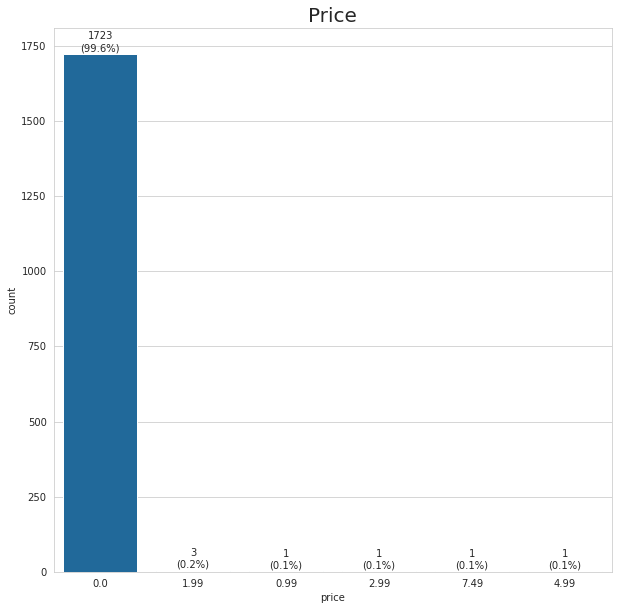

In [10]:
plt.figure(figsize= (10, 10))

ax= sns.countplot(x= 'price', data= df, order= df['price'].value_counts().index, palette= 'GnBu_r')
plt.title('Price', fontsize= 20)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    percent= height/len(df)*100
    
    ax.text(left_coord + width/2, height + 10,
           '{}\n({:.1f}%)'.format(height, percent), ha= 'center')

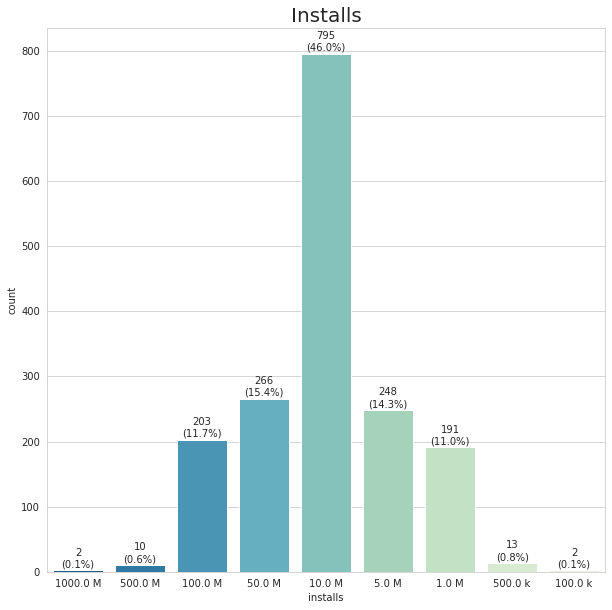

In [11]:
plt.figure(figsize= (10, 10))

ax= sns.countplot(x= 'installs', data= df, 
                  order= [ '1000.0 M', '500.0 M', '100.0 M', '50.0 M', '10.0 M', '5.0 M', '1.0 M', '500.0 k', '100.0 k'],
                  palette= 'GnBu_r')
plt.title('Installs', fontsize= 20)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    percent= height/len(df)*100
    
    ax.text(left_coord + width/2, height + 5,
           '{}\n({:.1f}%)'.format(height, percent), ha= 'center')

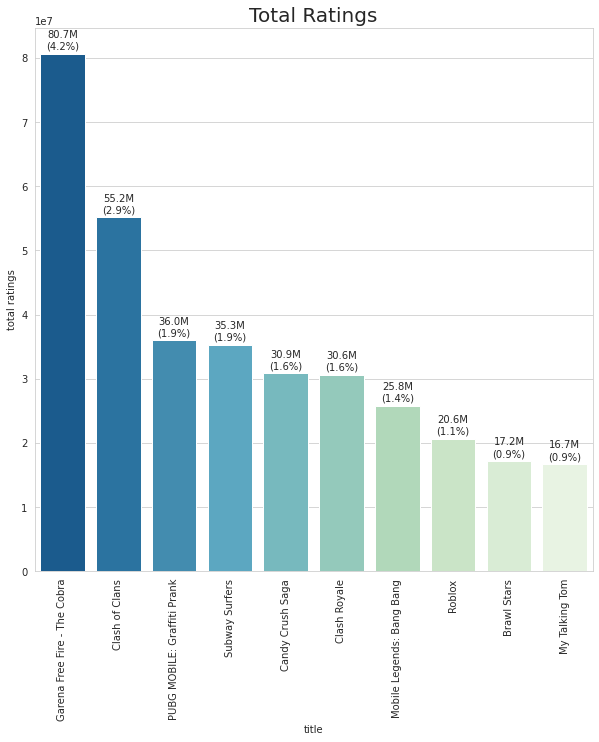

In [12]:
plt.figure(figsize= (10,10))

ax= sns.barplot(x= 'title', y= 'total ratings', data= df, 
                order= df.sort_values('total ratings', ascending= False).head(10).title, palette= 'GnBu_r')
plt.title('Total Ratings', fontsize= 20)
plt.xticks(rotation= 90)

for patch in ax.patches:
    height= patch.get_height()
    width= patch.get_width()
    left_coord= patch.get_x()
    percent= height/sum(df['total ratings'])*100
    
    ax.text(left_coord + width/2, height + 700000,
           '{:.1f}M\n({:.1f}%)'.format(height/1000000, percent), ha= 'center')
    

In [13]:
# Considering 5 and 4 star rating as good rate and the rest as bad rate, let's create total column rate (good and bad) and percent.

# Total of ratings
df['good ratings']= df['4 star ratings'] + df['5 star ratings']
df['bad ratings']= df['1 star ratings'] + df['2 star ratings'] + df['3 star ratings']

# Percent of ratings
df['good ratings percent']= df['good ratings'] / (df['good ratings'] + df['bad ratings'])
df['bad ratings percent']= df['bad ratings'] / (df['good ratings'] + df['bad ratings'])

df.head(2)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,good ratings,bad ratings,good ratings percent,bad ratings percent
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False,66414450,14264208,0.823197,0.176803
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False,28780197,7191762,0.800073,0.199927


In [14]:
# Let's see top 10 games good ratings percent with more than 1 milion of ratings
df_1m= df[df['total ratings'] > 1000000]

df_1m.sort_values('good ratings percent', ascending= False).head(10)[['title', 'good ratings percent', 'total ratings']]

,title,good ratings percent,total ratings
1130,Eternium,0.953730,2347273
1136,Tap Titans,0.947772,1344882
74,Sea Battle 2,0.926675,1098902
647,PewDiePie's Tuber Simulator,0.926148,1997711
1328,Top Eleven 2021: Be a Soccer Manager,0.922368,4566390
1624,كلمات كراش - لعبة تسلية وتحدي من زيتونة,0.920603,2314831
936,Sudoku.com - Free Sudoku,0.917156,1665667
404,Solitaire,0.916455,1576348
1337,New Star Soccer,0.914427,2267369
646,Best Fiends - Free Puzzle Game,0.913681,2069636


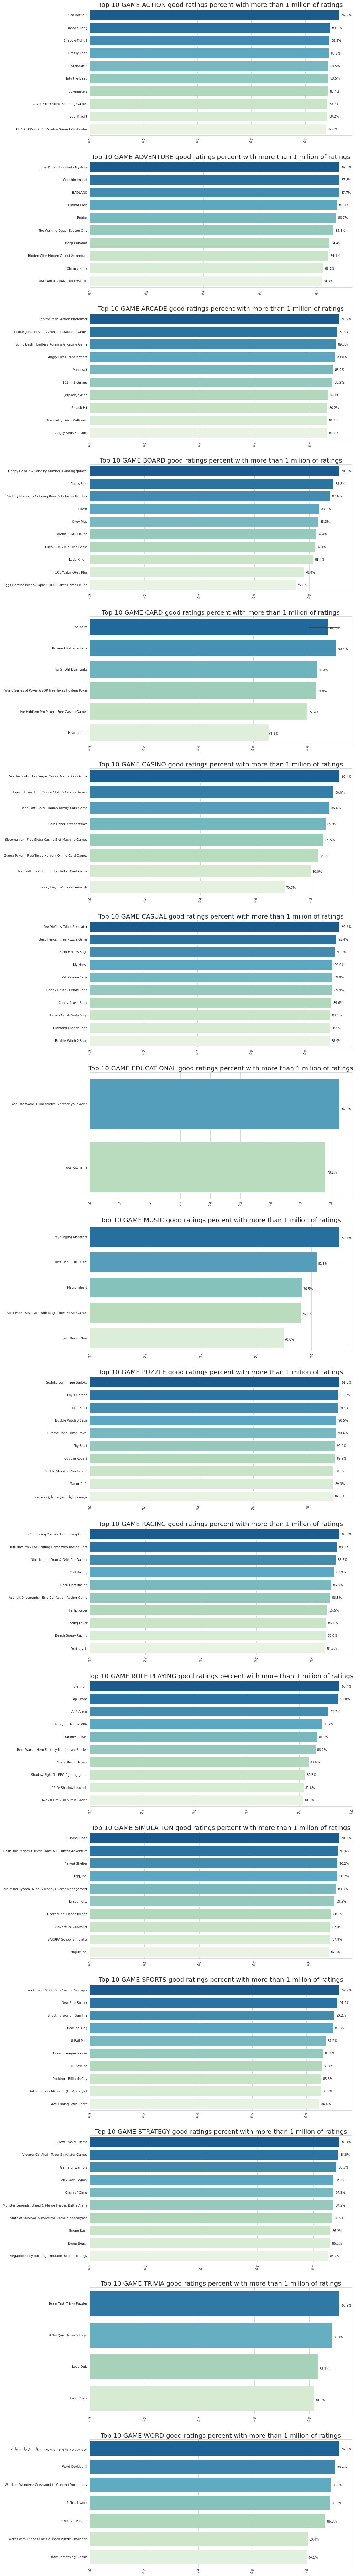

In [15]:
plt.figure(figsize= (15, 150))

n= 1

for i in df_1m['category'].unique():
    plt.subplot(17, 1, n)
    
    w= df_1m[df['category'] == i].sort_values('good ratings percent', ascending= False).head(10)[['title', 'good ratings percent', 'total ratings']]
    
    ax= sns.barplot(y= 'title', x= 'good ratings percent', data= w, palette= 'GnBu_r')
    plt.title('Top 10 {} good ratings percent with more than 1 milion of ratings'.format(i.upper()), fontsize= 20)
    plt.xticks(rotation= 75)
    plt.xlabel('')
    plt.ylabel('')
    
    for patch in ax.patches:
        height= patch.get_height()
        width= patch.get_width()
        bot_coord= patch.get_y()
        left_coord= patch.get_x()
    
        ax.text(left_coord + width*1.0285 , bot_coord + 0.5,
               '{:.1f}%'.format(width*100), ha= 'center')
    
    n+= 1

In [16]:
# Let's see the 10 worst good reviews with over 1 million reviews

df_1m.sort_values('bad ratings percent', ascending= False).head(10)[['title', 'good ratings percent', 'total ratings']]

,title,good ratings percent,total ratings
304,모두의마블,0.504055,1596758
117,Growtopia,0.606292,1006633
1441,Game of War - Fire Age,0.617046,1493010
7,Among Us,0.637276,11298789
54,Super Mario Run,0.653450,1571129
231,Rise Up,0.654692,1324747
401,Hearthstone,0.655834,1756400
1138,MovieStarPlanet,0.676113,1192107
105,Kiloblocks Lite,0.679985,2078790
946,LINE：ディズニー ツムツム,0.693010,1196438
